<a href="https://colab.research.google.com/github/marekrei/intro-2-ml-icl/blob/master/Lecture4_NNets1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 4: Artificial Neural Networks I


Loading the necessary libraries and the dataset.

We are using an example dataset containing statistics about different countries.



In [57]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('https://raw.githubusercontent.com/marekrei/ic-intro-to-ml-2020/master/data/country-stats.csv')
data.head()


,Country Name,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
0,Afghanistan,1560.67,44.62,2.44,23.86,60.07,5.39,71.0,3.33,8.5,-1.41,-1.40,5.45
1,Albania,9403.43,115.11,0.26,54.45,77.16,1.75,15.0,54.85,14.2,-0.72,-0.28,54.66
2,Algeria,8515.35,15.86,1.89,73.71,70.75,2.83,25.6,31.46,10.0,-0.54,-0.55,15.23
3,Antigua and Barbuda,19640.35,200.35,1.03,29.87,75.50,2.12,9.2,14.37,8.4,1.29,0.48,83.79
4,Argentina,12016.20,14.88,0.88,92.64,75.84,2.20,12.7,74.83,7.2,-0.49,-0.25,55.80


## Linear Regression

We can first try a very basic model: $y=x$

If $x$ and $y$ are very highly correlated and in the same range, then this can actually give a reasonable result.

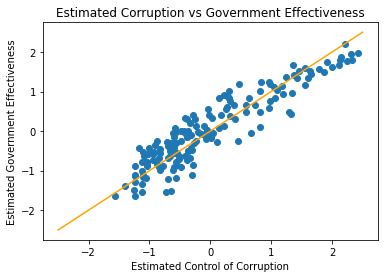

In [58]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Estimated Government Effectiveness (scale -2.5 to 2.5)"])
plt.title('Estimated Corruption vs Government Effectiveness')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Estimated Government Effectiveness")
x_sample = np.linspace(-2.5, 2.5, 100)
y = x_sample
plt.plot(x_sample, y, color='orange')
plt.show()

However, for most practical cases this is not true, with $x$ and $y$ varying along very different ranges.

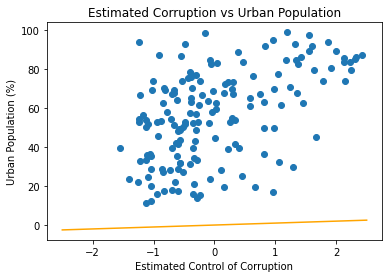

In [59]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")
x_sample = np.linspace(-2.5, 2.5, 100)
y = x_sample
plt.plot(x_sample, y, color='orange')
plt.show()

Multiplying the value $x$ with parameter $a$ (the *slope*) will change the angle of the line.

Adding the intercept $b$ (also known as *bias*) moves the line up and down.

Putting these together, makes the model much more powerful and we get the formula for simple linear regression: $y = ax + b$

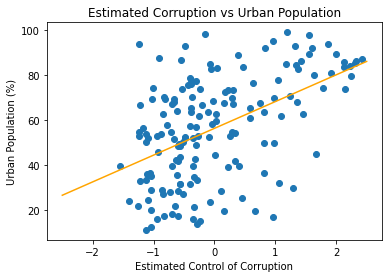

In [60]:
from sklearn.linear_model import LinearRegression
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")

model = LinearRegression(fit_intercept=True)
X = data["Estimated Control of Corruption (scale -2.5 to 2.5)"].values.reshape(-1,1)
Y = data["Urban Population (%)"]
model.fit(X, Y)

x_sample = np.linspace(-2.5, 2.5, 100)
plt.plot(x_sample, model.predict(x_sample.reshape(-1,1)), color='orange')
plt.show()

## Optimizing Linear Regression: Gradient Descent


Let's define a helper function to visualise a line ($y = ax + b$) that has been fit to a dataset (X, Y)

In [61]:
def plot_simple_linear_regression(X, Y, a, b, title, xlabel, ylabel):
    plt.scatter(X, Y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    x_sample = np.linspace(np.min(X), np.max(X), 100)
    plt.plot(x_sample, x_sample*a + b, color='orange')
    plt.show()

A verbose version of gradient descent, iterating over epochs and each datapoint:

epoch:0  a:0.0012  b:0.000000055  RMSE:43.6071
epoch:1  a:0.0015  b:0.000000079  RMSE:27.7650
epoch:2  a:0.0015  b:0.000000098  RMSE:27.1220
epoch:3  a:0.0015  b:0.000000116  RMSE:27.1017
epoch:4  a:0.0015  b:0.000000133  RMSE:27.1010


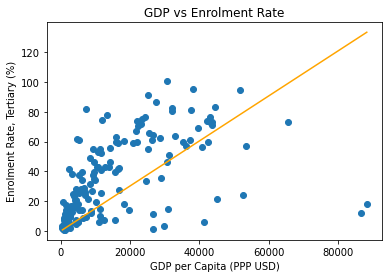

In [62]:
X = data["GDP per Capita (PPP USD)"].values
Y = data["Enrolment Rate, Tertiary (%)"].values

a = 0.0
b = 0.0
learning_rate = 1e-11

for epoch in range(5):
    update_a = 0.0
    update_b = 0.0
    error = 0.0
    for i in range(len(Y)):
        y_predicted = a * X[i] + b
        update_a += (y_predicted - Y[i])*X[i]
        update_b += (y_predicted - Y[i])
        error += np.square(y_predicted - Y[i])
    a = a - learning_rate * update_a
    b = b - learning_rate * update_b
    rmse = np.sqrt(error / len(Y))
    #print(epoch, a, b, rmse, sep='\t')
    print("epoch:{:d}  a:{:.4f}  b:{:.9f}  RMSE:{:.4f}".format(epoch, a, b, rmse))
plot_simple_linear_regression(X, Y, a, b, 
                              "GDP vs Enrolment Rate", 
                              "GDP per Capita (PPP USD)", 
                              "Enrolment Rate, Tertiary (%)")

A more compact version, using python vector operations:

epoch:0  a:0.0012  b:0.000000055  RMSE:43.6071
epoch:1  a:0.0015  b:0.000000079  RMSE:27.7650
epoch:2  a:0.0015  b:0.000000098  RMSE:27.1220
epoch:3  a:0.0015  b:0.000000116  RMSE:27.1017
epoch:4  a:0.0015  b:0.000000133  RMSE:27.1010


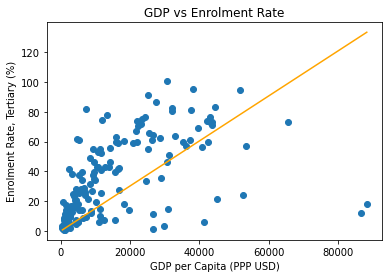

In [63]:
X = data["GDP per Capita (PPP USD)"].values
Y = data["Enrolment Rate, Tertiary (%)"].values

a = 0.0
b = 0.0
learning_rate = 1e-11

for epoch in range(5):
    y_predicted = a * X + b
    a = a - learning_rate * ((y_predicted - Y)*X).sum()
    b = b - learning_rate * (y_predicted - Y).sum()
    rmse = np.sqrt(np.square(y_predicted - Y).mean())
    #print(epoch, a, b, rmse, sep='\t')
    print("epoch:{:d}  a:{:.4f}  b:{:.9f}  RMSE:{:.4f}".format(epoch, a, b, rmse))

plot_simple_linear_regression(X, Y, a, b, 
                              "GDP vs Enrolment Rate", 
                              "GDP per Capita (PPP USD)", 
                              "Enrolment Rate, Tertiary (%)")

## Optimizing Linear Regression: The Analytical Solution with Scikit-Learn

Using scikit-learn to calculate the analytical least squares solution:

RMSE: 22.630490998345973


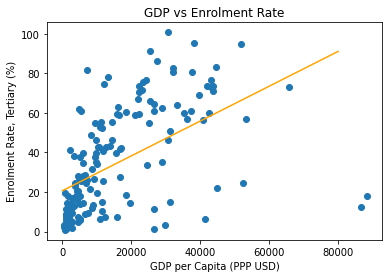

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
X = data["GDP per Capita (PPP USD)"].values.reshape(-1,1)
Y = data["Enrolment Rate, Tertiary (%)"]
model.fit(X, Y)

mse = np.square(Y - model.predict(X)).mean()
print("RMSE: " + str(np.sqrt(mse)))

plt.scatter(data["GDP per Capita (PPP USD)"], 
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

x_sample = np.linspace(0, 80000, 100)
plt.plot(x_sample, 
         model.predict(x_sample.reshape(-1,1)), 
         color='orange')
plt.show()

## Multiple Linear Regression

Predicting enrolment rate using all the available variables in the dataset.
We have to exclude the country tame (because it's text and we can only handle numerical features at the moment) and enrolment rate itself (because using that would be cheating).

We can't really visualize an 11-dimensional graph, so we'll still project onto the same GDP vs Enrolment Rate graph, but the predictions will be made based on all 11 features.

RMSE: 14.401961816704741


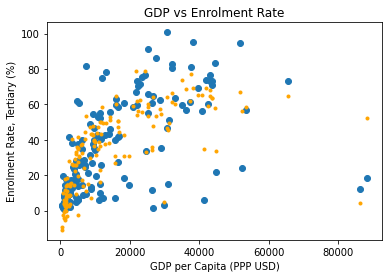

In [65]:
model = LinearRegression(fit_intercept=True)
X = data.copy().drop(["Country Name", "Enrolment Rate, Tertiary (%)"], axis=1)
Y = data["Enrolment Rate, Tertiary (%)"]

model.fit(X, Y)

mse = np.square(Y - model.predict(X)).mean()
print("RMSE: " + str(np.sqrt(mse)))

plt.scatter(data["GDP per Capita (PPP USD)"], 
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

x_pred = data["GDP per Capita (PPP USD)"]
plt.plot(x_pred, model.predict(X), '.', color='orange')
plt.show()

## Multi-layer Networks


Linear layer class in Pytorch. Simplified version based on [this](https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py) and [this](https://github.com/pytorch/pytorch/blob/master/torch/nn/functional.py).

In [66]:
#class Linear(Module):
class Linear():
    def __init__(self, in_features, out_features, bias=True):
        self.in_features = in_features
        self.out_features = out_features
        # create weight matrix
        self.weight = Parameter(torch.Tensor(out_features, in_features))
        if bias:
            # create bias vector
            self.bias = Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def forward(self, input):
        # multiply input with weight vector
        output = input.matmul(weight.t())
        if bias is not None:
            # add bias vector
            output += bias
        return output

A multi-layer perceptron in Pytorch

In [67]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer_h = nn.Linear(10, 5) # input->hidden weights
        self.layer_y = nn.Linear(5, 1) # hidden->output weights

    def forward(self, x):
        h = torch.tanh(self.layer_h(x)) # hidden layer with tanh activation
        y = torch.sigmoid(self.layer_y(h)) # output with sigmoid activation
        return y

net = Net() # constructing the network
input = torch.FloatTensor([x for x in range(10)]) # sample input
output = net(input) # executing the network
print(net) # printing network architecture
print(output) # printing output

Net(
  (layer_h): Linear(in_features=10, out_features=5, bias=True)
  (layer_y): Linear(in_features=5, out_features=1, bias=True)
)
tensor([0.2524], grad_fn=<SigmoidBackward>)
